<a href="https://colab.research.google.com/github/duberii/pid-playground/blob/main/activities/Calorimeters_and_Neutral_PID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Calorimeters and Neutral PID**
---
Welcome to Particle Identification Playground! In this activity, you will get a brief introduction to calorimeters, showers, and neutral particle identification.

**Before attempting this notebook, complete all of the activities in the Getting Started section.**

**After completing this notebook, you will be able to:**
*   Describe the role of calorimeters and summarize how they work
*   Describe the difference between electromagnetic and hadronic calorimeters
*   Identify which particles can be detected in different types of calorimeters

In [ ]:
#@title Run this cell before starting
!wget -q https://github.com/MohamedElashri/ROOT/releases/download/ubuntu/root_v6.28.04_Ubuntu_20.04.zip
!unzip -o -qq /content/root_v6.28.04_Ubuntu_20.04.zip
!apt-get -qq install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion &> /dev/null 2>&1
!rm -f root_v6.28.04_Ubuntu_20.04.zip
!wget -q http://archive.ubuntu.com/ubuntu/pool/main/o/openssl/libssl1.1_1.1.1f-1ubuntu2_amd64.deb
!sudo dpkg -i libssl1.1_1.1.1f-1ubuntu2_amd64.deb &> /dev/null 2>&1
!rm -f libssl1.1_1.1.1f-1ubuntu2_amd64.deb
!wget -q -O GlueX_Particle_Gun_Simplified.hdf5 https://github.com/duberii/pid-playground/raw/main/data/GlueX_Particle_Gun_Simplified.hdf5
!wget -q -O BCalShowers.hdf5 https://github.com/duberii/pid-playground/raw/main/data/BCalShowers.hdf5

import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")
import ctypes
ctypes.cdll.LoadLibrary('/content/root_build/lib//libCore.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib//libThread.so')
ctypes.cdll.LoadLibrary('/content/root_build/lib//libTreePlayer.so')
from IPython.display import YouTubeVideo
import plotly.express as pxp
import pandas as pd
import numpy as np
import ipywidgets as widgets
import plotly
from ipywidgets import interact, interactive, fixed, interact_manual, widgets, HBox, VBox, Layout
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from google.colab import output
import xml.etree.ElementTree as ET
import warnings
from ROOT import *
data =pd.DataFrame()
warnings.filterwarnings("ignore")
output.enable_custom_widget_manager()
def get_charge(ptype):
  if ptype in ["Electron", "Muon", "Pi-", "K-",'AntiProton']:
    return -1
  else:
    return 1
simulation_dataframe = pd.read_hdf('GlueX_Particle_Gun_Simplified.hdf5')
BCalShowers = pd.read_hdf("BCalShowers.hdf5")
BCalShowers['t_up'] = BCalShowers['t_up'].apply(np.array)
BCalShowers['t_down'] = BCalShowers['t_down'].apply(np.array)
BCalShowers['pulse_integral_down'] = BCalShowers['pulse_integral_down'].apply(np.array)
BCalShowers['pulse_integral_up'] = BCalShowers['pulse_integral_up'].apply(np.array)

Welcome to JupyROOT 6.28/04


---
##**Calorimeters**
---
A **calorimeter** is a detector that is able to measure the energy of particles that interact with it. Calorimeters are the only detectors that are able to detect neutral particles, which makes them an extremely important component of every particle physics experiment. However, calorimeters measure the energy of a particle by absorbing it, meaning it has to be the final detector that a particle interacts with. For this reason, calorimeters are almost always placed in the outermost section of a detector.

Modern calorimeters have two main components: a passive absorber and an active detector. The goal of a **passive absorber** is to interact with particles as much as possible. Through these interactions, new particles are created by converting some of the particle's energy into mass (remember $E=mc^2$). These new particles continue to interact with the absorber, creating new particles as well. The result is called a **shower**: a huge number of low-energy particles that are produced as a result of a particle interacting with a calorimeter. To detect this shower of particles, we use some type of detector. One common choice is to use a **scintillator**, which is a material that emits light when a charged particle passes through it. Many of the particles that are produced as part of the shower are charged, so these particles produce a flash in the scintillator, which we can detect.

Based on the material we choose for the passive absorber, we can optimize the calorimeter for electromagnetic interactions or for strong interactions. **Electromagnetic calorimeters** are calorimeters that are optimized to interact electromagnetically with particles that pass through them. This makes them extremely useful for detecting particles like photons and electrons, which are extremely common in particle physics experiments. **Hadronic calorimeters**, on the other hand, are optimized for particles that experience the strong force, such as protons, neutrons, pions, and kaons. However, electromagnetic calorimeters are still able to detect hadrons (and hadronic calorimeters are still able to detect photons and electrons), but they are not able to absorb all of the energy of the particle, which gives us a low, inaccurate energy reading.

If the passive absorber and the detector are two separate materials, we call the calorimeter a **sampling calorimeter**. Sampling calorimeters typically consist of alternating layers of the passive absorber and the detector, though there are other designs that can be used. If we have a material that can act as both the passive absorber and the detector, we can make the entire calorimeter out of that material, and we don't need to have alternating layers at all. Calorimeters that are made of just one material (which serves as both a passive absorber and a detector) are called **homogeneous calorimeters**.

####**Question #1:**
---
The plot below shows the kinetic energy (measured by a calorimeter) and the momentum of pions. The red line shows the expected relationship between the kinetic energy and momentum of a pion. What do you notice about the energies of the pions detected in this calorimeter? Is the calorimeter that measured this energy more likely an electromagnetic calorimeter or a hadronic calorimeter?

Double click to edit this cell and answer the following questions: What do you notice about the energies of the pions detected in this calorimeter? Is the calorimeter that measured this energy more likely an electromagnetic calorimeter or a hadronic calorimeter?

{'Pion+', 'Kaon+', 'Electron', 'Proton'}


Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).


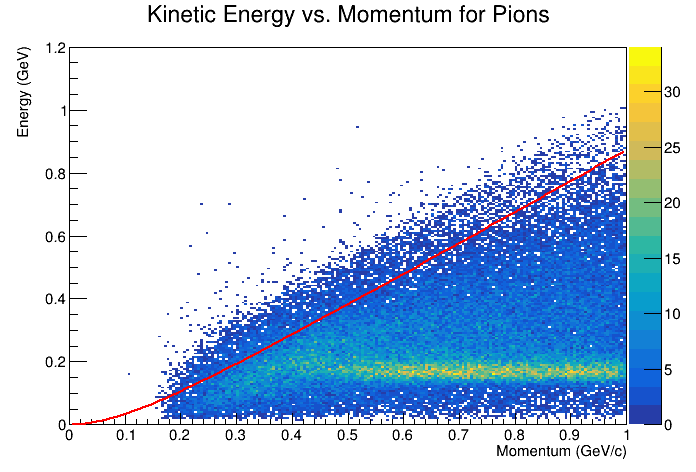

In [ ]:
# @title
hist2d = TH2D('h1','Kinetic Energy vs. Momentum for Pions; Momentum (GeV/c); Kinetic Energy (GeV)', 200, 0, 1, 200,0, 1.2)
PionLine = TF1("Pion Line","sqrt(pow(x,2)+pow(0.139,2))-0.139",0,1)
for row in simulation_dataframe.loc[simulation_dataframe['Particle']=='Pion+'].iloc:
  hist2d.Fill(row['p'],row['E'])
hist2d.SetStats(0)
hist2d.Draw('COLZ')
PionLine.Draw("SAME")
gROOT.GetListOfCanvases().Draw()

#####**Solution:**

The energies of the pions were measured to be much lower than they should be. This is shown because the majority of the data lies below the expected line instead of along it. It may also seem strange that the data seems to be harshly cut off at around 0.16 GeV/c in momentum. However, at such low momentum, pions are moving relatively slow, meaning they are easily stopped by the materials of the detector. These pions that stop are unable to be detected in any of our detectors, though this usually isn't an issue, because the pions that are created in experiments are usually moving pretty fast.

Based on this, it is most likely that the calorimeter that measured the energies of these pions was an electromagnetic calorimeter because the calorimeter was unable to accurately measure the energy of the pions (which should produce a hadronic shower). An electromagnetic calorimeter isn't able to absorb all of the energy of a hadron, which we see as an extremely low energy value.

---
##**The GlueX Barrel Calorimeter**
---
The GlueX Barrel Calorimeter is an electromagnetic calorimeter that surrounds the central region of the detector. It is called the barrel calorimeter because of its barrel-like shape, which allows it to detect particles that travel away from the beamline (which is what we call the direction that the photon beam travels along). The barrel calorimeter (or BCal for short) is shown in yellow in the diagram below.

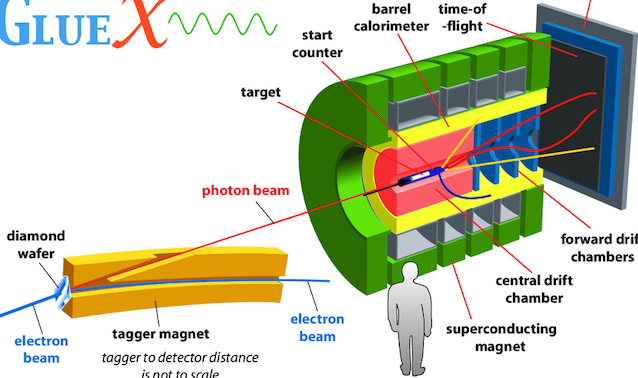

The barrel calorimeter consists of 48 trapezoid-shaped **modules** that join together to form the circular shape of the calorimeter. Run the cell below to see how these modules are stacked to form the round shape of the barrel calorimeter.

In [ ]:
# @title
module_points = {i:[] for i in range(48)}
inner_radius = 65
outer_radius = 87.46
inner_radius = 65
inner_module_width = 8.52
outer_module_width = 11.46
fig = go.FigureWidget()
fig.update_layout(xaxis_range=[-100,100], yaxis_range=[-100,100],width=520,height=500,xaxis_title="X", yaxis_title="Y")
for i in range(48):
  angle = i * -1*np.pi/24 + np.pi
  unit_vector = np.array([np.cos(angle+np.pi/2),np.sin(angle+np.pi/2)])
  inner_radius_vector = inner_radius * np.array([np.cos(angle),np.sin(angle)])
  outer_radius_vector = outer_radius * np.array([np.cos(angle),np.sin(angle)])
  module_points[i].append(inner_radius_vector + inner_module_width/2 * unit_vector)
  module_points[i].append(inner_radius_vector - inner_module_width/2 * unit_vector)
  module_points[i].append(outer_radius_vector - outer_module_width/2 * unit_vector)
  module_points[i].append(outer_radius_vector + outer_module_width/2 * unit_vector)
  module_points[i].append(inner_radius_vector + inner_module_width/2 * unit_vector)
  fig.add_scatter(x=[module_points[i][j][0] for j in range(5)],y=[module_points[i][j][1] for j in range(5)],fill="toself",name="Module " + str(i+1),mode="lines")
fig.show()

These trapezoid-shaped modules are extremely long (about 3.9 meters long), and when they are stacked together, they form the body of the barrel calorimeter. Run the cell below to create a 3D model of the modules of the barrel calorimeter.

In [ ]:
# @title
module_points = {i:[] for i in range(48)}
inner_radius = 65
outer_radius = inner_radius + 22.46
inner_module_width = 8.52
outer_module_width = 11.46
fig = go.FigureWidget()
fig.update_layout(scene = {"xaxis_title":'Z', "yaxis_title":'X', 'zaxis_title':'Y'})
for module in range(48):
  angle = module * np.pi/24
  unit_vector = np.array([np.cos(angle+np.pi/2),np.sin(angle+np.pi/2),0])
  inner_radius_vector = inner_radius * np.array([np.cos(angle),np.sin(angle),0])
  outer_radius_vector = outer_radius * np.array([np.cos(angle),np.sin(angle),0])
  module_points[module].append(inner_radius_vector + inner_module_width/2 * unit_vector)
  module_points[module].append(inner_radius_vector - inner_module_width/2 * unit_vector)
  module_points[module].append(outer_radius_vector - outer_module_width/2 * unit_vector)
  module_points[module].append(outer_radius_vector + outer_module_width/2 * unit_vector)
  module_points[module].append(inner_radius_vector + inner_module_width/2 * unit_vector + np.array([0,0,390]))
  module_points[module].append(inner_radius_vector - inner_module_width/2 * unit_vector + np.array([0,0,390]))
  module_points[module].append(outer_radius_vector - outer_module_width/2 * unit_vector + np.array([0,0,390]))
  module_points[module].append(outer_radius_vector + outer_module_width/2 * unit_vector + np.array([0,0,390]))
  i = [0,0,0,3,0,1,1,2,2,3,4,4]
  j = [1,2,4,4,1,4,2,5,3,6,5,6]
  k = [2,3,3,7,4,5,5,6,6,7,6,7]
  fig.add_trace(go.Mesh3d(y=[pt[0] for pt in module_points[module]],z=[pt[1] for pt in module_points[module]],x=[pt[2] for pt in module_points[module]],name="Module " + str(module+1),flatshading=True,i=i,j=j,k=k,hovertemplate="Module " + str(module+1) + "<extra></extra>"))
fig.show()

Each module of the detector is further divided into **layers** and **sectors**, which gives us more precise information about the position of the particle that interacts with the barrel calorimeter. The layers are horizontal sections of the modules, while the sectors are vertical sections of the modules. Each module has 4 layers and 4 sectors.

In [ ]:
# @title
def calculate_x(layer,sector):
  return 8.51*sector/4 + 1.475*(sector-2)/2*((layer+1)**2-layer-1)/20
def calculate_y(layer,sector):
  return 22.46*((layer+1)**2-layer-1)/20
fig = go.FigureWidget()
fig.update_layout(xaxis_range=[-3,10], yaxis_range=[-1,25],width=600,height=600,xaxis_title="X", yaxis_title="Y",showlegend=False)
fig.update_yaxes(scaleanchor="x",scaleratio=1)
for layer in range(1,5):
  for sector in range(1,5):
    fig.add_scatter(x=[calculate_x(layer,sector),calculate_x(layer,sector-1),calculate_x(layer-1,sector-1),calculate_x(layer-1,sector)],y=[calculate_y(layer,sector),calculate_y(layer,sector-1),calculate_y(layer-1,sector-1),calculate_y(layer-1,sector)],fill="toself", mode="lines",name="Layer: " + str(layer) + ", Sector: " + str(sector),hoverinfo="text")
    fig.update()
fig.show()

####**Question #2:**
---
The modules of the barrel calorimeter are made of a combination of lead and scintillators. A diagram of an extremely small piece of a module is shown in the image below. Based on this information, is the GlueX barrel calorimeter a sampling calorimeter or a homogeneous calorimeter?

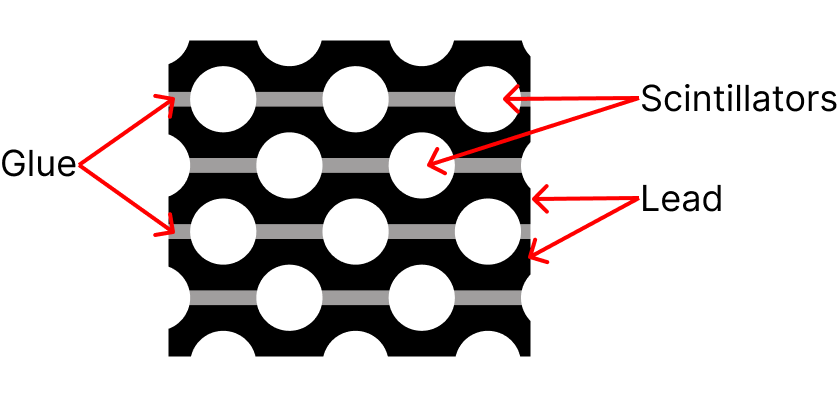

Double click to edit this cell and answer the following question: Based on this information, is the GlueX barrel calorimeter a sampling calorimeter or a homogeneous calorimeter?

#####**Solution:**

Because the calorimeter has separate materials that serve as a passive absorber and an active detector, the barrel calorimeter is a sampling calorimeter. The lead serves as the passive absorber, while the scintillator serves as the active detector.

---
##**How Does the Barrel Calorimeter Work?**
---
When a particle passes through the barrel calorimeter, it interacts with the lead absorber and produces a shower of charged particles. These charged particles pass through the scintillators, producing a flash of light. Because the scintillators are lined up along the length of the calorimeter, we set up two photon detectors at either end of the barrel calorimeter.

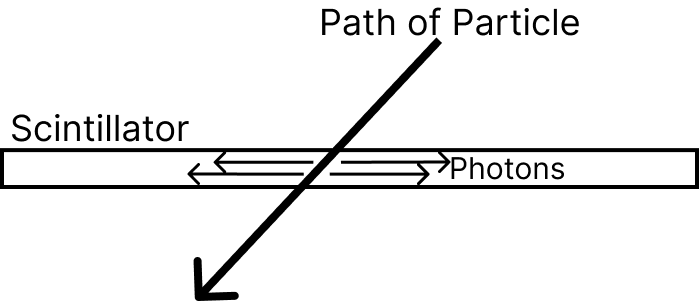

We end up detecting two flashes of light (one on either end of the scintillating fiber), and our goal is to use the timing of these flashes and their intensity to gain information about the energy of the particle that produced that flash of light. We refer to these interactions that produce flashes of light as a **hit**, and our goal with calorimeters is to use the information about these hits to measure the energy of the particles that produced these hits. This process can be broken down into multiple steps.

---
###**Step 1: Finding Hit Coordinates**
---
Based on the module, layer, and sector that we detect the hit in, we can find the x and y coordinates of the hit. To find the z coordinate of the hit, we will need to use the timing of the flashes of light at the front and back of the detector (called the upstream and downstream end). In fact, the z coordinate can be calculated using the following formula:
$$
z = \frac{v_{eff}}{2}* 0.0625*\left ( t_{up}-t_{down}\right )
$$
where $v_{eff}$ is the effective speed of light in the scintillator, $t_{up}$ is the time of the light pulse at the upstream end, and $t_{down}$ is the time of the light pulse at the downstream end.

####**Question #3:**
---
Inside plastic scintillator, $v_{eff}=16.75$ $cm/ns$. Create a new column in the `BCalShowers` dataframe called 'z', which is calculated using the upstream pulse time and the downstream pulse time. The values for $t_{up}$ and $t_{down}$ are stored in the 't_up' and 't_down' columns of the dataframe stored in the variable `BCalShowers`.

In [ ]:
BCalShowers['z'] =

#####**Solution:**

In [ ]:
BCalShowers['z'] = 16.75/2*0.0625*(BCalShowers['t_up']-BCalShowers['t_down'])

---
###**Step 2: Finding the Hit Intensity**
---
The amount of light we detect should be directly proportional to the total energy of the shower. However, as light travels through a material, some of the light will be absorbed by the material or escape the material, which decreases the amount of light that we are able to detect. This effect is called **attenuation**, and we need to take this into account to get accurate measurements of shower energies. The formula for the intensity of light as a function of distance is given by: $$
I(x) = I_0e^{-x/\lambda}
$$
where $I(x)$ is the intensity of the light at a distance $x$ from the hit, and $I_0$ is the intensity of the light when it was first created. The quantity $\lambda$ is a property of materials called the **attenuation length**, which tells us how quickly a flash of light loses its intensity as it travels through the material. In practice, we are only able to measure the quantity $I(x)$, but we need to find $I_0$ to accurately measure the energy of the shower.

####**Question #4**
---
Solve the equation shown above for $I_0$ to see how we can calculate $I_0$ based on a distance ($x$) and the measured intensity ($I(x)$).

Double click to edit this cell and answer the following question: How do we calculate $I_0$ in terms of $I(x)$ and $x$?

#####**Solution:**

If we multiply both sides by $e^{x/\lambda}$, we get: $$
I_0 = I(x)e^{x/\lambda}
$$
Based on the material we use for our scintillating fiber, we would be able to determine the attenuation length $\lambda$. We would also be able to measure the light intensity ($I(x)$) by directly measuring the light at the end of the scintillating fibers, and the distance from the creation of the light ($x$) using the method in Question #3. All together, we use these to calculate how much light was initially created (which is measured by $I_0$).

####**Question #5:**
---
Let's say that a particle passes through a scintillating fiber at a distance $z$ from the upstream end of the detector (the end closer to the creation of the photon beam). We observe a pulse of light, which we convert into an intensity (a "pulse integral"). This pulse integral is stored in the `BCalShowers` dataframe in the column called "pulse_integral_up". Using your answer to Question #4 and the $z$ coordinates you calculated in Question #3, complete the function below to calculate the intensity of the light created as the particle passed through the scintillator ($I_0$), assuming the attenuation length is $\lambda = 525$ cm.

**Note:** To apply the exponential function $e^{x}$, you should use the `np.exp` function. For example, to calculate $e^{2}$, you could write `np.exp(2)`.


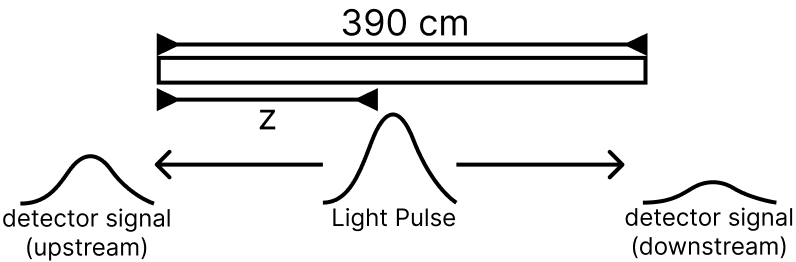

In [ ]:
def calculate_I0_up(event):
  I0_up = #Complete this code
  return I0_up

#####**Solution:**

In [ ]:
def calculate_I0_up(event):
  I0_up = event['pulse_integral_up']*np.exp(event['z']/525)
  return I0_up

In this case, our $I(x)$ (the measured intensity) is stored in the `'pulse_integral_up'`column of the dataframe. We then calculate $e^{x/\lambda}$, which we can do using the `np.exp` function. Note that in this case, the distance the light has to travel is $z$, meaning we actually want to calculate $e^{z/\lambda}$, which we do in the function shown above.

####**Question #6:**
---
Part of the light that is created as the particle passes through the scintillator travels in the other direction and is detected at the downstream end. The intensity measured at the downstream end is stored in the `pulse_integral_down` column of the dataframe. Using your answer to Question #4a and the $z$ coordinates you calculated in Question #3, complete the function below to calculate the intensity of the light created as the particle passed through the scintillator ($I_0$), assuming the attenuation length is $\lambda = 525$ cm.

**Hint:** How far does the light have to travel from position $z$ to the downstream end of the scintillator? You may find the diagram in question #5 to be useful for visualizing what you are calculating.

In [ ]:
def calculate_I0_down(event):
  I0_down = #Complete this code
  return I0_down

#####**Solution:**

In [ ]:
def calculate_I0_down(event):
  I0_down = event['pulse_integral_down']*np.exp((390-event['z'])/525)
  return I0_down

In this case, our $I(x)$ (the measured intensity) is stored in the `'pulse_integral_down'`column of the dataframe. We then calculate $e^{x/\lambda}$, which we can do using the `np.exp` function. Unlike the previous question, the distance the light had to travel is not $z$, but rather $390-z$ since the light is traveling to the opposite end of the detector. Therefore, we need to calculate $e^{(390-z)/\lambda}$, which is implemented in the function shown above.

---
###**Step 3: Calculating Energy**
---
We have now calculated two values for $I_0$ based on the upstream detector and the downstream detector. The true intensity is simply the sum of these two values: $$
I_0 = I_{0,up}+ I_{0,down}
$$

The last step is to convert this amplitude to an energy value. To do this, we use the fact that the intensity of the light we detect should be directly related to the energy of the shower: $$
E_{hit} = c*I_0
$$ where $E_{hit}$ is the energy that the particle deposited in that scintillator, $I_0$ is the intensity of the light that was created as the particle passed through the scintillator, and $c$ is simply a constant that tells us how the energy of the hit is related to the intensity of the light.

####**Question #7:**
---
Using the functions from Questions #5 and #6, complete the function below to calculate the hit energy. Use the constant $c=2/130000$.

**Note:** The last line of code is necessary to create a new column ("E"), which is calculated based on the other columns. Ideally, we wouldn't have to use this "apply" method, but the columns we are working with here are actually a bunch of lists. It's not too important for you to know, but just know that there is a reason we can't calculate the hit energy directly from the columns like we did in the "Introduction to Pandas" notebook.

In [ ]:
def calculate_hit_E(event):
  c=2/130000
  hit_E= #Complete this code
  return hit_E

BCalShowers['hit E'] = BCalShowers.apply(calculate_hit_E,axis=1)

#####**Solution:**

In [ ]:
def calculate_hit_E(event):
  c=2/130000
  hit_E= c*(calculate_I0_up(event)+calculate_I0_down(event))
  return hit_E

BCalShowers['hit E'] = BCalShowers.apply(calculate_hit_E,axis=1)

---
##**Neutral PID**
---
Because calorimeters are the only detectors that are able to detect neutral particles, we want to try and use the properties of the showers to determine what type of particle produced that shower. For example, how can we tell the difference between a shower created by a photon and a shower created by a neutron?  

In general, this is a very difficult task, and classifying particles using shower properties is an ongoing field of research. However, there are a few metrics used by the barrel calorimeter that we can test out for now.

A powerful tool for studying the properties of the showers produced by different particles is simulations. If we can accurately simulate the shower production process, we can use the simulations to study the properties of showers and find ways to identify the particle that produced the shower based on the properties of the shower.

Based on these simulations, we can also make some interesting visualizations of showers. The plot shown below will visualize the simulated showers produced by the particle selected in the dropdown menu below.  Also, you can zoom in on a shower by clicking and dragging a box over the area you want to zoom into. If you want to zoom back out, click the 'home' button in the top right corner of the plot (it will only show up when your mouse hovers over the plot). The black circles represent the boundaries of the barrel calorimeter, and the dots represent individual hits. The darker the hit is, the higher the energy of the hit.

Each time you run the cell, a random shower will be visualized, so feel free to run the cell multiple times to see different showers.

In [ ]:
# @title {'run': 'auto'}
particle = "Muon" # @param ["Photon", "Neutron", "KLong", "Proton", "K+", "Pi+", "Electron", "Muon"]
def closest_hit(prev_layer,x,y):
  prev_distance = 10000000
  solution = (0,0)
  for hit in prev_layer.iloc:
    distance = ((x-hit['x'])**2 + (y-hit['y'])**2)**0.5
    if distance < prev_distance:
      solution = (hit['x'],hit['y'],hit['opacity'])
      prev_distance = distance
  if prev_distance > ((x)**2 + (y)**2)**0.5:
    return (x,y, 0)
  else:
    return solution
df = pd.read_hdf('BCalShowers.hdf5')
eventNum = np.random.randint(0,len(df.index))
while df.iloc[eventNum]['particle'] != particle:
  eventNum = np.random.randint(0,len(df.index))
event = df.iloc[eventNum]
inner_radius = 65
outer_radius = 87.46
inner_module_width = 8.52
outer_module_width = 11.46
fig = go.FigureWidget()
fig.update_layout(xaxis_range=[-100,100], yaxis_range=[-100,100],width=520,height=500,xaxis_title="X", yaxis_title="Y")
points = {'x':[],'y':[],'z':[]}
energies = []
rs = [inner_radius + 22.46*((i+0.5)**2-i-0.5)/20 for i in range(1,5)]
for i in range(len(event['sector'])):
  angle = event['module'][i] * -1*np.pi/24 + np.pi
  unit_radius_vector = np.array([np.cos(angle),np.sin(angle)])
  unit_vector = np.array([np.cos(angle+np.pi/2),np.sin(angle+np.pi/2)])
  inner_radius_vector = inner_radius * np.array([np.cos(angle),np.sin(angle)])
  outer_radius_vector = outer_radius * np.array([np.cos(angle),np.sin(angle)])
  origin = inner_radius_vector - inner_module_width/2 * unit_vector
  position = origin + unit_vector * (8.51*(event['sector'][i]-0.5)/4 + 1.475*(event['sector'][i]-0.5)/2*((event['layer'][i]+0.5)**2-event['layer'][i]-0.5)/20)
  position += 22.46*((event['layer'][i]+0.5)**2-event['layer'][i]-0.5)/20 *unit_radius_vector
  points['x'].append(position[0])
  points['y'].append(position[1])
  z = 1/30*16.75*(event['t_up'][i]-event['t_down'][i])
  points['z'].append(z)
  energies.append(2/130000*(event['pulse_integral_up'][i]*np.exp(z/525)+event['pulse_integral_down'][i]*np.exp((390-z)/525)))
each_hit_df = pd.DataFrame()
each_hit_df['module'] = event['module']
each_hit_df['sector'] = event['sector']
each_hit_df['layer'] = event['layer']
each_hit_df['x'] = points['x']
each_hit_df['y'] = points['y']
each_hit_df['z'] = points['z']
each_hit_df['E'] = energies
each_hit_df['opacity'] = 0.75*(np.array(energies)-min(energies))/(max(energies)-min(energies))+0.25
opacities = np.array(energies)/max(energies)
previous_layer_hits = pd.DataFrame()
for i in range(1,5):
  layer_hits = each_hit_df.loc[each_hit_df['layer']==i]
  if i != 1 and len(previous_layer_hits.index)>0 and len(layer_hits.index)>0:
    for hit in layer_hits.iloc:
      angle = hit['module'] * -1*np.pi/24 + np.pi
      unit_radius_vector = np.array([np.cos(angle),np.sin(angle)])
      unit_vector = np.array([np.cos(angle+np.pi/2),np.sin(angle+np.pi/2)])
      inner_radius_vector = inner_radius * np.array([np.cos(angle),np.sin(angle)])
      outer_radius_vector = outer_radius * np.array([np.cos(angle),np.sin(angle)])
      origin = inner_radius_vector - inner_module_width/2 * unit_vector
      position = origin + unit_vector * (8.51*(hit['sector']-0.5)/4 + 1.475*(hit['sector']-0.5)/2*((hit['layer']+0.5)**2-hit['layer']-0.5)/20)
      position += 22.46*((hit['layer']+0.5)**2-hit['layer']-0.5)/20 *unit_radius_vector
      x2 = position[0]
      y2= position[1]
      x1,y1,opacity = closest_hit(each_hit_df.loc[each_hit_df['layer']<i],x2,y2)
      fig.add_shape(type="line",x0=x1,y0=y1,x1=x2,y1=y2,opacity=hit['opacity'],line_color="#636EFA")
  previous_layer_hits = layer_hits
fig.add_scatter(x=points['x'],y=points['y'],mode='markers',marker = {'opacity':opacities})
fig.add_shape(type="circle", xref="x", yref="y", x0=-1*inner_radius, y0=-1*inner_radius, x1=inner_radius, y1=inner_radius, line_color="black")
fig.add_shape(type="circle", xref="x", yref="y", x0=-1*outer_radius, y0=-1*outer_radius, x1=outer_radius, y1=outer_radius, line_color="black")
fig.show()

We can also calculate the z coordinates of the hits (see Question #3), and use these coordinates to create a 3D model of the showers. The following cell plots the showers in 3D space. You can click and drag to rotate the shower and view it from different angles. The lines are connections between hits, and the darker the line, the more energy was deposited in that region of the shower.

Each time you run this cell, you will see a new shower, so feel free to run this cell multiple times.

In [ ]:
# @title {'run': 'auto'}
particle = "Muon" # @param ["Photon", "Neutron", "KLong", "Proton", "K+", "Pi+", "Electron", "Muon"]
def closest_hit(prev_layer,x,y,z):
  prev_distance = 10000000
  solution = (0,0)
  for hit in prev_layer.iloc:
    distance = ((x-hit['x'])**2 + (y-hit['y'])**2 + (z-hit['z'])**2)**0.5
    if distance < prev_distance:
      solution = (hit['x'],hit['y'],hit['z'],hit['opacity'])
      prev_distance = distance
  if prev_distance > ((2*x)**2 + (2*y)**2)**0.5:
    return (x,y,z, 0)
  else:
    return solution
df = pd.read_hdf('BCalShowers.hdf5')
eventNum = np.random.randint(0,len(df.index))
while df.iloc[eventNum]['particle'] != particle:
  eventNum = np.random.randint(0,len(df.index))
event = df.iloc[eventNum]
inner_radius = 65
outer_radius = 87.46
inner_module_width = 8.52
outer_module_width = 11.46
fig = go.FigureWidget()
fig.update_layout(xaxis_range=[-100,100], yaxis_range=[-100,100],width=520,height=500,xaxis_title="X", yaxis_title="Y")
points = {'x':[],'y':[],'z':[]}
energies = []
rs = [inner_radius + 22.46*((i+0.5)**2-i-0.5)/20 for i in range(1,5)]
for i in range(len(event['sector'])):
  angle = event['module'][i] * -1*np.pi/24 + np.pi
  unit_radius_vector = np.array([np.cos(angle),np.sin(angle)])
  unit_vector = np.array([np.cos(angle+np.pi/2),np.sin(angle+np.pi/2)])
  inner_radius_vector = inner_radius * np.array([np.cos(angle),np.sin(angle)])
  outer_radius_vector = outer_radius * np.array([np.cos(angle),np.sin(angle)])
  origin = inner_radius_vector - inner_module_width/2 * unit_vector
  position = origin + unit_vector * (8.51*(event['sector'][i]-0.5)/4 + 1.475*(event['sector'][i]-0.5)/2*((event['layer'][i]+0.5)**2-event['layer'][i]-0.5)/20)
  position += 22.46*((event['layer'][i]+0.5)**2-event['layer'][i]-0.5)/20 *unit_radius_vector
  points['x'].append(position[0])
  points['y'].append(position[1])
  z = 1/30*16.75*(event['t_up'][i]-event['t_down'][i])
  points['z'].append(z)
  energies.append(2/130000*(event['pulse_integral_up'][i]*np.exp(z/525)+event['pulse_integral_down'][i]*np.exp((390-z)/525)))
each_hit_df = pd.DataFrame()
each_hit_df['module'] = event['module']
each_hit_df['sector'] = event['sector']
each_hit_df['layer'] = event['layer']
each_hit_df['x'] = points['x']
each_hit_df['y'] = points['y']
each_hit_df['z'] = points['z']
each_hit_df['E'] = energies
each_hit_df['opacity'] = 0.5*(np.array(energies)-min(energies))/(max(energies)-min(energies))+0.5
opacities = np.array(energies)/max(energies)
previous_layer_hits = pd.DataFrame()
for i in range(1,5):
  layer_hits = each_hit_df.loc[each_hit_df['layer']==i]
  if i != 1 and len(previous_layer_hits.index)>0 and len(layer_hits.index)>0:
    for hit in layer_hits.iloc:
      angle = hit['module'] * -1*np.pi/24 + np.pi
      unit_radius_vector = np.array([np.cos(angle),np.sin(angle)])
      unit_vector = np.array([np.cos(angle+np.pi/2),np.sin(angle+np.pi/2)])
      inner_radius_vector = inner_radius * np.array([np.cos(angle),np.sin(angle)])
      outer_radius_vector = outer_radius * np.array([np.cos(angle),np.sin(angle)])
      origin = inner_radius_vector - inner_module_width/2 * unit_vector
      position = origin + unit_vector * (8.51*(hit['sector']-0.5)/4 + 1.475*(hit['sector']-0.5)/2*((hit['layer']+0.5)**2-hit['layer']-0.5)/20)
      position += 22.46*((hit['layer']+0.5)**2-hit['layer']-0.5)/20 *unit_radius_vector
      x2 = position[0]
      y2= position[1]
      z2 = hit['z']
      x1,y1,z1,opacity = closest_hit(each_hit_df.loc[each_hit_df['layer']<i],x2,y2,z2)
      fig.add_scatter3d(x=[x1,x2],y=[y1,y2],z=[z1,z2],mode='lines',line={'color':"rgba(99,110,250,"+str(round(hit['opacity'],2))+")",'width':8})
  previous_layer_hits = layer_hits
#fig.add_scatter3d(x=points['x'],y=points['y'],z=points['z'],mode='markers')
fig.update_layout(showlegend=False)
fig.show()

####**Question #8**
---

After looking at the showers produced by various particles, is it possible to determine which particle produced a shower just by looking at the shower?

Double click to edit this cell and answer the following question: After looking at the showers produced by various particles, is it possible to determine which particle produced a shower just by looking at the shower?

#####**Solution:**

It seems pretty difficult to identify what particle left the shower. The best we can do is make observations about the general type of shower produced. For example, photon showers tend to be skinnier than other particles' showers. However, these observations are not powerful enough to reliably identify what particle left a given shower.

####**Question #9**
---

Using the 'particle' field of the dropdown menu below, you can select the type of particle you want to study the shower properties of. You can also change the property you want to study by changing the 'metric' field. Finally, run the cell to create a 2D histogram of the chosen shower property and the energy of the shower (because most shower properties strongly depend on the energy of the shower).

Use these plots to study the shower properties of various particles. The meanings of all of these properties can be found in the table shown below.

Warning in <TROOT::Append>: Replacing existing TH1: h1 (Potential memory leak).


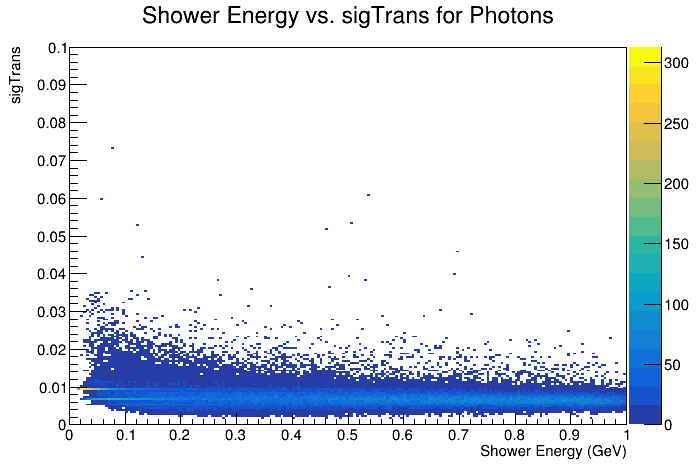

In [ ]:
# @title {'run': 'auto'}
df = pd.read_hdf("showerProperties.hdf5")
metric = "sigTrans" # @param ["sigLong", "sigTheta", "sigTrans"]
particle = "Photon" # @param ["Photon", "Neutron", "KLong"]
if metric == 'sigLong':
  rng = [0,10]
elif metric == 'sigTrans':
  rng = [0,0.1]
elif metric == 'sigTheta':
  rng = [0,0.2]
hist2d = TH2D('h1','Shower Energy vs. ' + metric + ' for ' + particle + 's; Shower Energy (GeV);' + metric, 200, 0, 1, 200,rng[0], rng[1])
[hist2d.Fill(row['E'],row[metric]) for row in df.loc[df['particle']==particle].iloc]
hist2d.SetStats(0)
hist2d.Draw('COLZ')
gROOT.GetListOfCanvases().Draw()

Double click to edit this cell and record any of your observations about the shower properties.

#####**Shower Properties Definitions**

If we crudely approximate that a shower forms the shape of a cone, then we can define the following properties:

| <h5><b>Property</b></h5> 	|                                     <h5><b>Definition</b></h5>                                     	|
|---------:	|:----------------------------------------------------------------------------------:	|
|  <h6><b>sigLong </b></h6>  	|   <h6> The standard deviation of the distance of the hits along the length of the cone </h6> 	|
| <h6><b>sigTrans </b></h6> 	| <h6> The standard deviation of the radius of the hits from the central axis of the cone </h6>	|
| <h6><b>sigTheta </b></h6>	|    <h6> The standard deviation of the angular distribution of the hits in the cone   </h6>  	|

Here is a diagram that shows the directions of interest for the properties given above. The cone itself represents the shower.

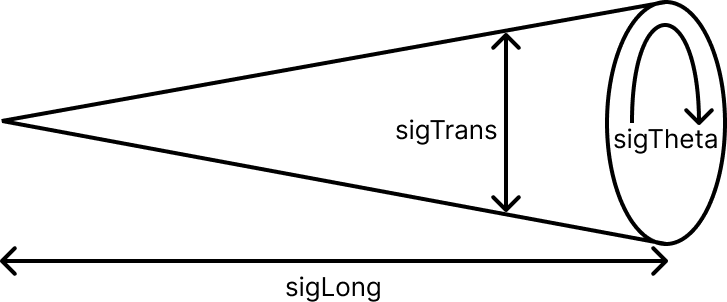

#####**Solution:**


*   In general, the energies of neutron showers are very low, which is shown by the cutoff around 0.4 GeV in energy.
*   sigLong for photons tends to be around 1.5 (meaning the hits are very spread out in the long direction of the shower), whereas it tends to be almost 0 for Klongs and neutrons (meaning the showers of neutrons and Klongs are typically flat)
*   The sigTheta plots for photons and Klongs look very similar, but the sigTheta plot for neutrons is cut off around 0.4 GeV in energy (see the first bullet) and there is a patch of neutron showers with extremely low energy and extremely low sigTheta.
*   The sigTrans of neutrons and Klongs are much more variable than the sigTrans of photons, which is consistently very small. This suggests that neutron showers are typically much wider than

